In [ ]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/My Drive/CS4248/fulltrain.csv", encoding='utf-8',  names=["label", "text"])
df.dropna()
df.head()

,label,text
0,1,"A little less than a decade ago, hockey fans w..."
1,1,The writers of the HBO series The Sopranos too...
2,1,Despite claims from the TV news outlet to offe...
3,1,After receiving 'subpar' service and experienc...
4,1,After watching his beloved Seattle Mariners pr...


In [ ]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
df=df.dropna()
count_class_1 = len(df[df['label'] == 1])
count_class_2 = len(df[df['label'] == 2])
count_class_3 = len(df[df['label'] == 3])
count_class_4 = len(df[df['label'] == 4])

print(count_class_1, count_class_2, count_class_3, count_class_4)

14047 6942 17870 9995


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

# lower, remove punctuation, remove digits
def clean(x):
  # remove digits
  review = re.sub('\w*\d\w*','', x)

  # remove punctuation
  review = re.sub('[%s]' % re.escape(string.punctuation), '', review)

  # lower
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stop_words]
  review = ' '.join(review)
  return review

df['text']=df['text'].apply(lambda x: clean(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

class_1 = df[df['label'] == 1]
class_2 = df[df['label'] == 2]
class_3 = df[df['label'] == 3]
class_4 = df[df['label'] == 4]

# Function for generating word clouds
text_1 = ' '.join(class_1['text'].tolist())
text_2 = ' '.join(class_2['text'].tolist())
text_3 = ' '.join(class_3['text'].tolist())
text_4 = ' '.join(class_4['text'].tolist())

# wc = WordCloud(width=1920, height=1000, max_words=150,colormap="Dark2").generate(text_1)
# plt.figure(figsize=(10,10))
# plt.title('wc1')
# plt.imshow(wc)


In [ ]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


[Text(0.5, 1.0, 'Propaganda Bigram')]

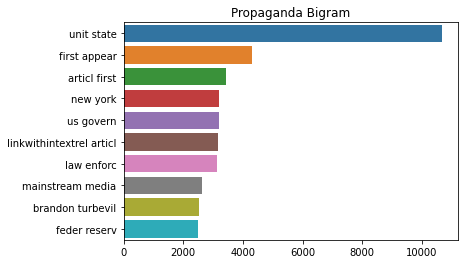

In [ ]:
top_bi_grams=get_top_ngram(class_3['text'],n=2)
x,y=map(list,zip(*top_bi_grams))
sns.barplot(x=y,y=x).set(title='Propaganda Bigram')

In [ ]:
import gensim

def preprocess_news(df):
    corpus=[]
    for news in df['text']:
        corpus.append(news.split())
    return corpus

corpus=preprocess_news(class_1)

dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

In [ ]:
pip install pyldavis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dic)
vis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word', stop_words='english')
count_1=cv.fit_transform(class_3['text'])
count_array = count_1.toarray()
df_count = pd.DataFrame(data=count_array,columns = cv.get_feature_names_out())
df_sum = df_count.sum(axis=0)
df_sum.nlargest(10)

In [ ]:
from textblob import TextBlob
df['polarity']=df['text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [ ]:
class_1 = df[df['label'] == 1]['polarity']
class_2 = df[df['label'] == 2]['polarity']
class_3 = df[df['label'] == 3]['polarity']
class_4 = df[df['label'] == 4]['polarity']

plt.hist(class_4, bins=500)
plt.title('Trusted')
plt.show()

0    0.193722
1    0.087879
2    0.075233
3    0.112057
4    0.157817
Name: polarity, dtype: float64

In [ ]:
df['word_count']=df['text'].apply(lambda x:len(x))


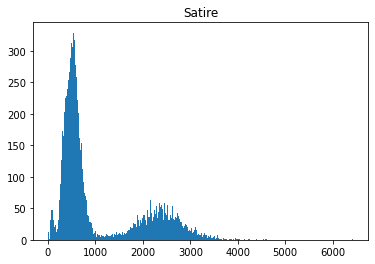

In [ ]:
class_1 = df[df['label'] == 1]['word_count'].copy(deep=True)
class_2 = df[df['label'] == 2]['word_count'].copy(deep=True)
class_3 = df[df['label'] == 3]['word_count'].copy(deep=True)
class_4 = df[df['label'] == 4]['word_count'].copy(deep=True)


plt.hist(class_1, bins=500)
plt.title('Satire')
plt.show()